In [15]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
from dotenv import load_dotenv
import time
load_dotenv()

True

In [7]:
class processState(TypedDict):
    process: str

In [8]:
# create nodes
def processStep1(state: processState):
    process = "process 1 completes"
    print(process)
    return {"process": process}

def processStep2(state: processState):
    process = "process 2 in progress ..."
    print(process)
    time.sleep(30)
    process = "process 2 completes"
    print("process 2 completes")
    return {"process": process}

def processStep3(state: processState):
    process = "process 3 completes"
    print(process)
    return {"process": process}

In [10]:
# create graph and attach nodes
graph = StateGraph(processState)

graph.add_node("processStep1", processStep1)
graph.add_node("processStep2", processStep2)
graph.add_node("processStep3", processStep3)

graph.add_edge(START, "processStep1")
graph.add_edge("processStep1", "processStep2")
graph.add_edge("processStep2", "processStep3")
graph.add_edge("processStep3", END)

In [23]:
checkpointer = InMemorySaver()
workflow = graph.compile(checkpointer=checkpointer)

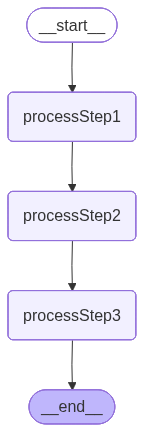

In [24]:
workflow

In [25]:
prompt = {"process": ""}
config = {"configurable": {"thread_id": "1"}}
workflow.invoke(prompt, config=config)

process 1 completes
process 2 in progress ...


KeyboardInterrupt: 

In [26]:
workflow.get_state(config)

StateSnapshot(values={'process': 'process 1 completes'}, next=('processStep2',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0adb1f-5a9a-63be-8001-f7232d310756'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-10-20T12:40:29.083743+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0adb1f-5a8b-6975-8000-001087ce1c7c'}}, tasks=(PregelTask(id='2483df59-239d-10fd-97cc-d8d54a9b3246', name='processStep2', path=('__pregel_pull', 'processStep2'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [27]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'process': 'process 1 completes'}, next=('processStep2',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0adb1f-5a9a-63be-8001-f7232d310756'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-10-20T12:40:29.083743+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0adb1f-5a8b-6975-8000-001087ce1c7c'}}, tasks=(PregelTask(id='2483df59-239d-10fd-97cc-d8d54a9b3246', name='processStep2', path=('__pregel_pull', 'processStep2'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'process': ''}, next=('processStep1',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0adb1f-5a8b-6975-8000-001087ce1c7c'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-10-20T12:40:29.077746+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint

In [29]:
workflow.invoke(None, config={"configurable": {"thread_id": "1", "checkpoint_id": "1f0adb1f-5a9a-63be-8001-f7232d310756"}})

process 2 in progress ...
process 2 completes
process 3 completes


{'process': 'process 3 completes'}

In [30]:
workflow.get_state(config)

StateSnapshot(values={'process': 'process 3 completes'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0adb27-9491-662e-8003-0bf481f29021'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-10-20T12:44:09.909224+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0adb27-948a-60d9-8002-8c0c4bb013bf'}}, tasks=(), interrupts=())

In [31]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'process': 'process 3 completes'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0adb27-9491-662e-8003-0bf481f29021'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-10-20T12:44:09.909224+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0adb27-948a-60d9-8002-8c0c4bb013bf'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'process': 'process 2 completes'}, next=('processStep3',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0adb27-948a-60d9-8002-8c0c4bb013bf'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-10-20T12:44:09.907221+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0adb1f-5a9a-63be-8001-f7232d310756'}}, tasks=(PregelTask(id='a5a4defa-27eb-62bf-6fa0-d739d2004c4a', name='processStep3', path=('__pregel_pull', 'processSt